<a href="https://colab.research.google.com/github/HemantPatar/Project-DYnamics-M20/blob/main/Project_6_(Census_Income_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Census Income Data Set

Prediction task is to determine whether a person makes over 50K a year.

In [1]:
#Importing libraries 

In [2]:
# Data Manipulation 
import numpy as np
import pandas as pd
import math

# Visualization 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import missingno
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Feature Selection and Encoding
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning 
import sklearn.ensemble as ske
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

# Plot the Figures Inline
%matplotlib inline

In [6]:
# Load Training and Test Data Sets
headers = ['age', 'workclass', 'fnlwgt', 
           'education', 'education-num', 
           'marital-status', 'occupation', 
           'relationship', 'race', 'sex', 
           'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 
           'predclass']

from google.colab import files
uploaded = files.upload()
import io
import pandas as pd
train_ci= pd.read_csv(io.BytesIO(uploaded['adult.data.csv']),header=None,  names=headers, na_values=["?"],sep=',\s')

#train_ci = pd.read_csv('adult.data.csv', header=None, names=headers, na_values=["?"],  sep=',\s')

import io
import pandas as pd
test_ci = pd.read_csv(io.BytesIO(uploaded['adult.test.csv']), header=None, names=headers,na_values=["?"],sep=',\s', skiprows=1)
#test_ci = pd.read_csv('adult.test.csv', header=None, names=headers,na_values=["?"],sep=',\s', skiprows=1)

Saving adult.data.csv to adult.data.csv
Saving adult.test.csv to adult.test.csv


In [7]:
train_ci

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
test_ci

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [9]:
train_ci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  predclass       32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
test_ci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       15318 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      15315 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16007 non-null  object
 14  predclass       16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [12]:
# Join Datasets
df_ci = train_ci.append(test_ci)
df_ci.reset_index(inplace=True)
df_ci.drop('index',inplace=True,axis=1)


In [13]:
df_ci

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [14]:
#change column name predclass to income for further process
df_ci = df_ci.rename(columns={"predclass": "income"})

In [15]:
# Describing all the Numerical Features
df_ci.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [16]:
# Describing all the Categorical Features
df_ci.describe(include=['O'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,24720


In [17]:
#checking for null values
df_ci.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

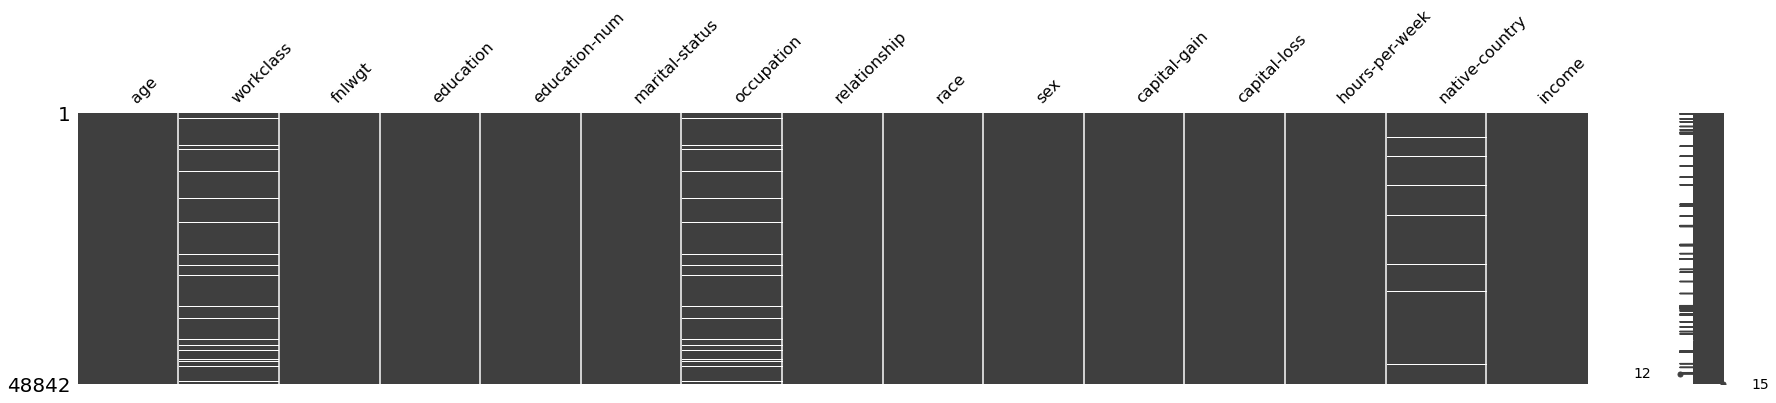

In [18]:
# How many missing values are there in our dataset?
missingno.matrix(df_ci, figsize = (30,5))

Now, the summary shows that the variables - workclass, occupation and native.country contain missing values. All of these variables are categorical data type. So, I will impute the missing values with the most frequent value- the mode.

In [19]:
#Impute missing values with mode
for col in ['workclass', 'occupation', 'native-country']:
    df_ci[col].fillna(df_ci[col].mode()[0], inplace=True)

In [20]:
#Check again for missing values
df_ci.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Now we can see that there are no missing values in the dataset.

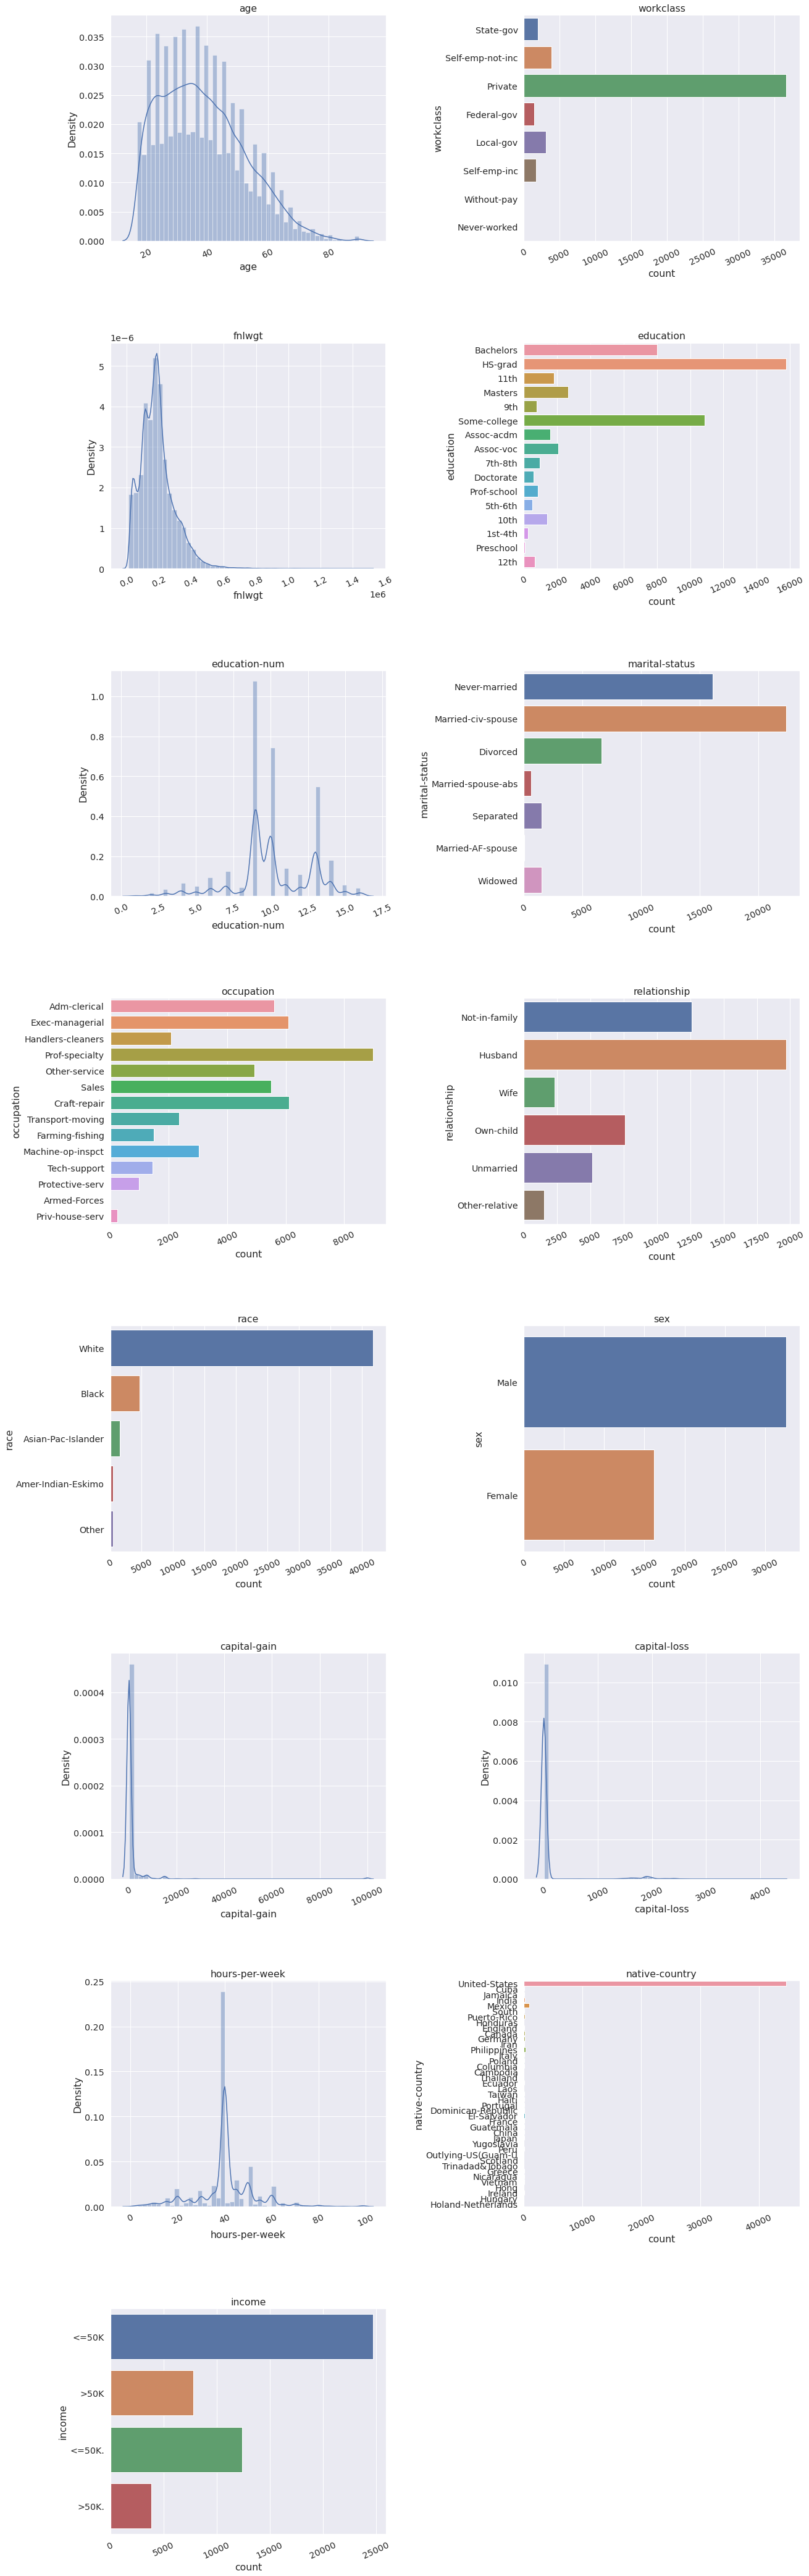

In [21]:
# Let’s plot the distribution of each feature
def plot_distribution(df_ci, cols=8, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(df_ci.shape[1]) / cols)
    sns.set(font_scale=1.3)
    for i, column in enumerate(df_ci.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if df_ci.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=df_ci)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(df_ci[column])
            plt.xticks(rotation=25)
    
plot_distribution(df_ci, cols=2, width=20, height=75, hspace=0.45, wspace=0.5)

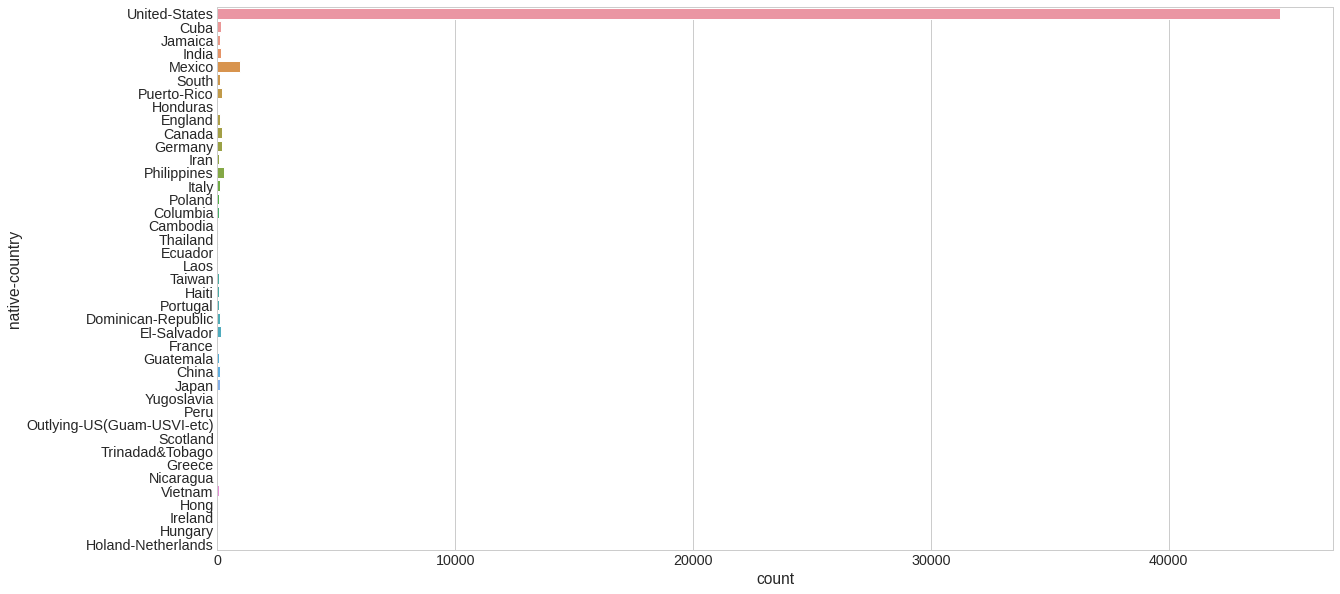

In [22]:
# Can we bucket some of these groups?
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,10)) 
sns.countplot(y="native-country", data=df_ci)

In [23]:
df_ci.shape

(48842, 15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd75b2f8630>,
      dtype=object)

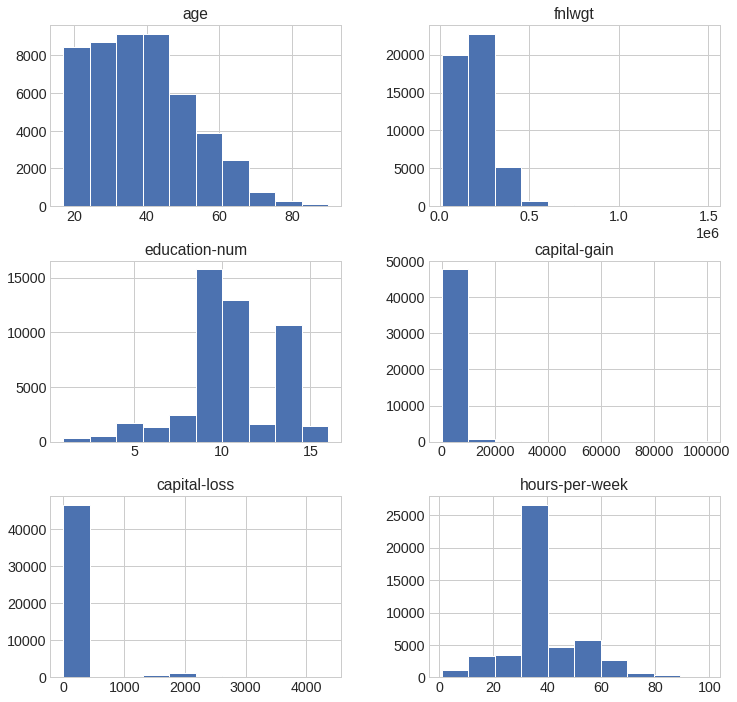

In [24]:
#Visualizing the numerical features of the dataset using histograms to analyze the distribution of those features in the dataset

rcParams['figure.figsize'] = 12, 12
df_ci[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].hist()

#Can visualise that data such as capital gain, capitaln loss, fnlwgt is right skewed an other columns can be grouped for better visualisation

In [25]:
df_ci.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [26]:
# Identify Numeric features
numeric_features = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','income']

# Identify Categorical features
cat_features = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [27]:
df_ci.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
education-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


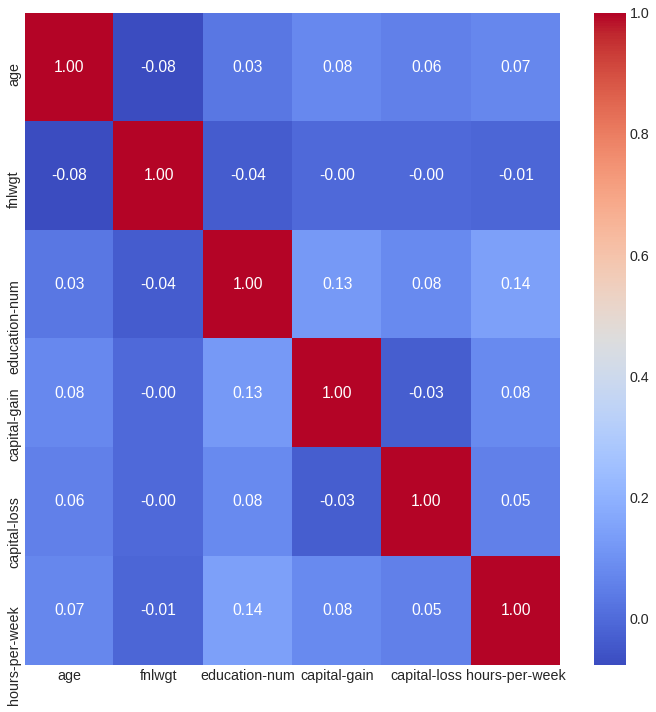

In [28]:
# Correlation matrix between numerical values
sns.heatmap(df_ci.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")


In [29]:
#frequency of categories
for col in df_ci.columns:
    if df_ci[col].dtype=="object":
        print(df_ci[col].value_counts())
        print()

Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

Prof-specialty       8981
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                

In [30]:
#we need to remove "." in income
df_ci["income"].replace("<=50K.","<=50K",inplace=True)
df_ci["income"].replace(">50K.",">50K",inplace=True)

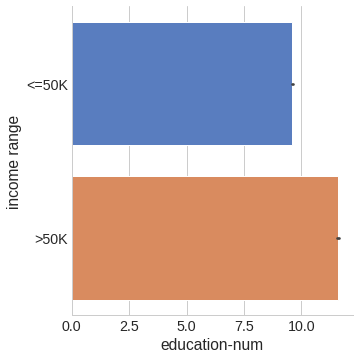

In [31]:
# Explore Education Num vs Income
g = sns.factorplot(x="education-num",y="income",data=df_ci,kind="bar",size = 5,palette = "muted")
#g.despine(left=True)
g = g.set_ylabels("income range")


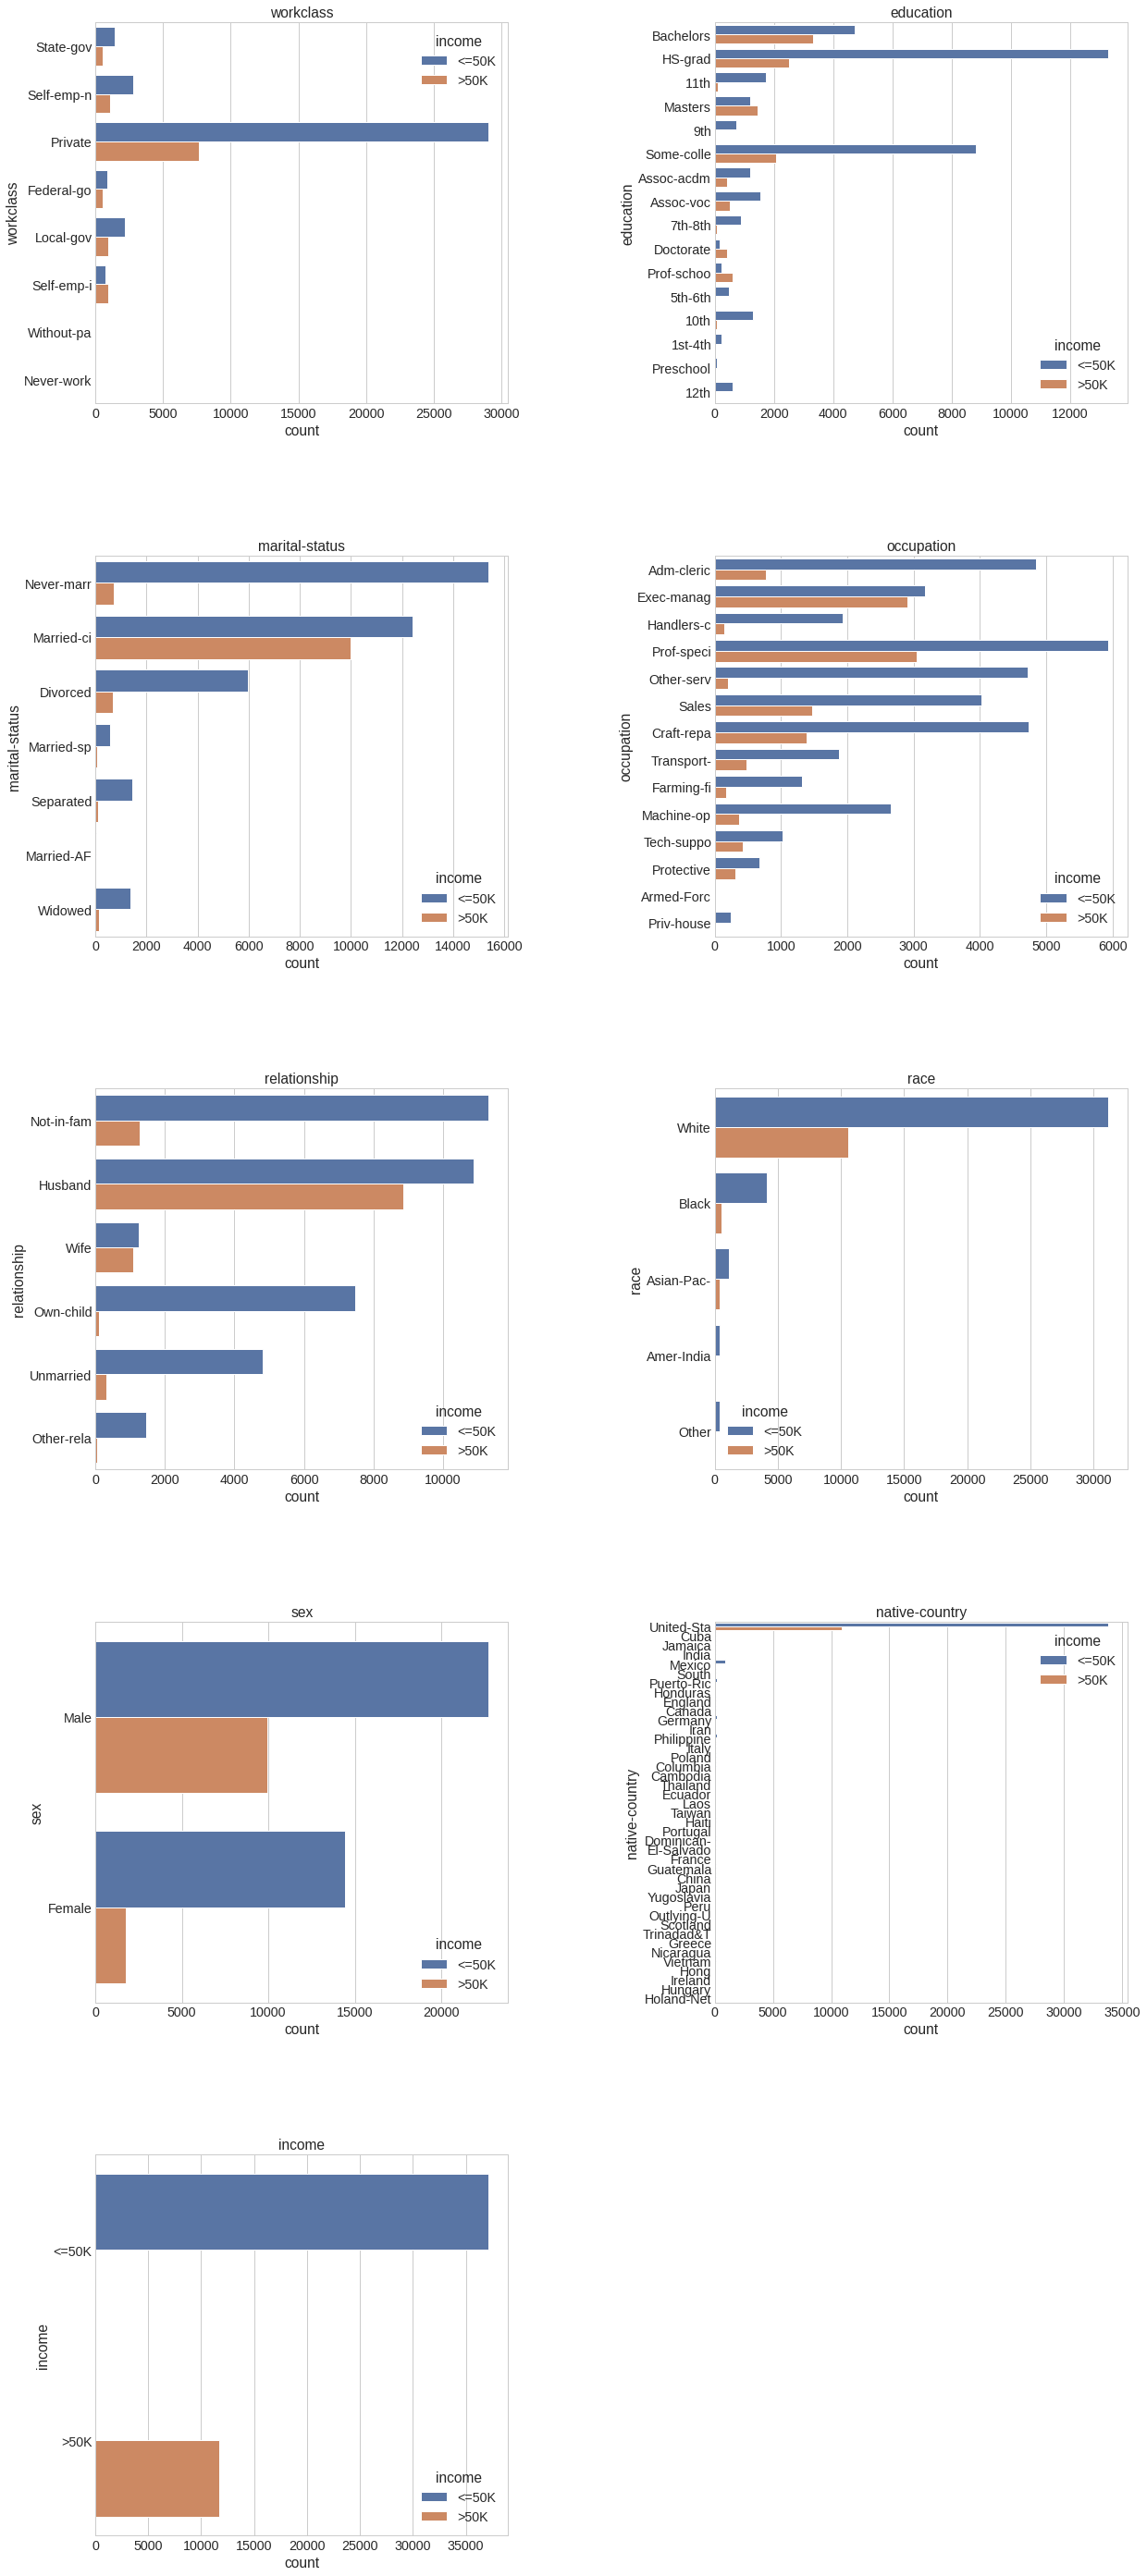

In [32]:
# Plot a count of the categories from each categorical feature split by our prediction class: salary - income.
def plot_bivariate_bar(df_ci, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    df_ci = df_ci.select_dtypes(include=[np.object])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(df_ci.shape[1]) / cols)
    for i, column in enumerate(df_ci.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if df_ci.dtypes[column] == np.object:
            g = sns.countplot(y=column, hue=hue, data=df_ci)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            
plot_bivariate_bar(df_ci, hue='income', cols=2, width=20, height=50, hspace=0.4, wspace=0.5)

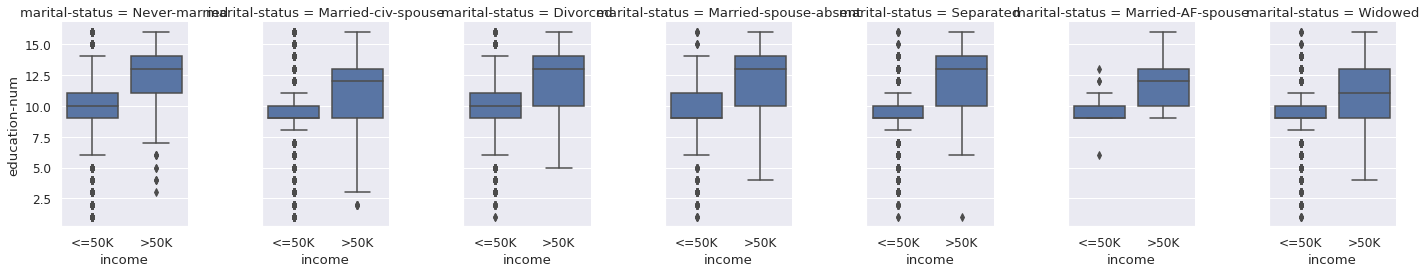

In [33]:
# Effect of Marital Status and Education on Income, across Marital Status.
plt.style.use('seaborn-whitegrid')
sns.set(font_scale=1.1) 
g = sns.FacetGrid(df_ci, col='marital-status', size=4, aspect=.7)
g = g.map(sns.boxplot, 'income', 'education-num')

No handles with labels found to put in legend.


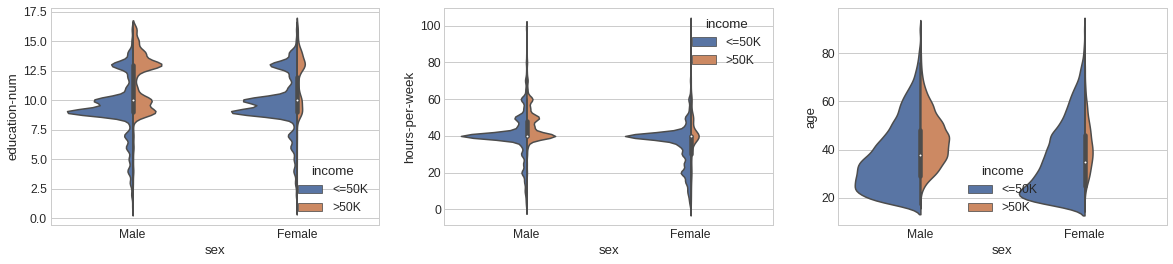

In [34]:
# Historical Trends on the Sex, Education, HPW and Age impact on Income.
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,4)) 
plt.legend(loc="lower right")
plt.subplot(1, 3, 1)
sns.violinplot(x='sex', y='education-num', hue='income', data=df_ci, split=True, scale='count')

plt.subplot(1, 3, 2)
sns.violinplot(x='sex', y='hours-per-week', hue='income', data=df_ci, split=True, scale='count')

plt.subplot(1, 3, 3)
sns.violinplot(x='sex', y='age', hue='income', data=df_ci, split=True, scale='count')

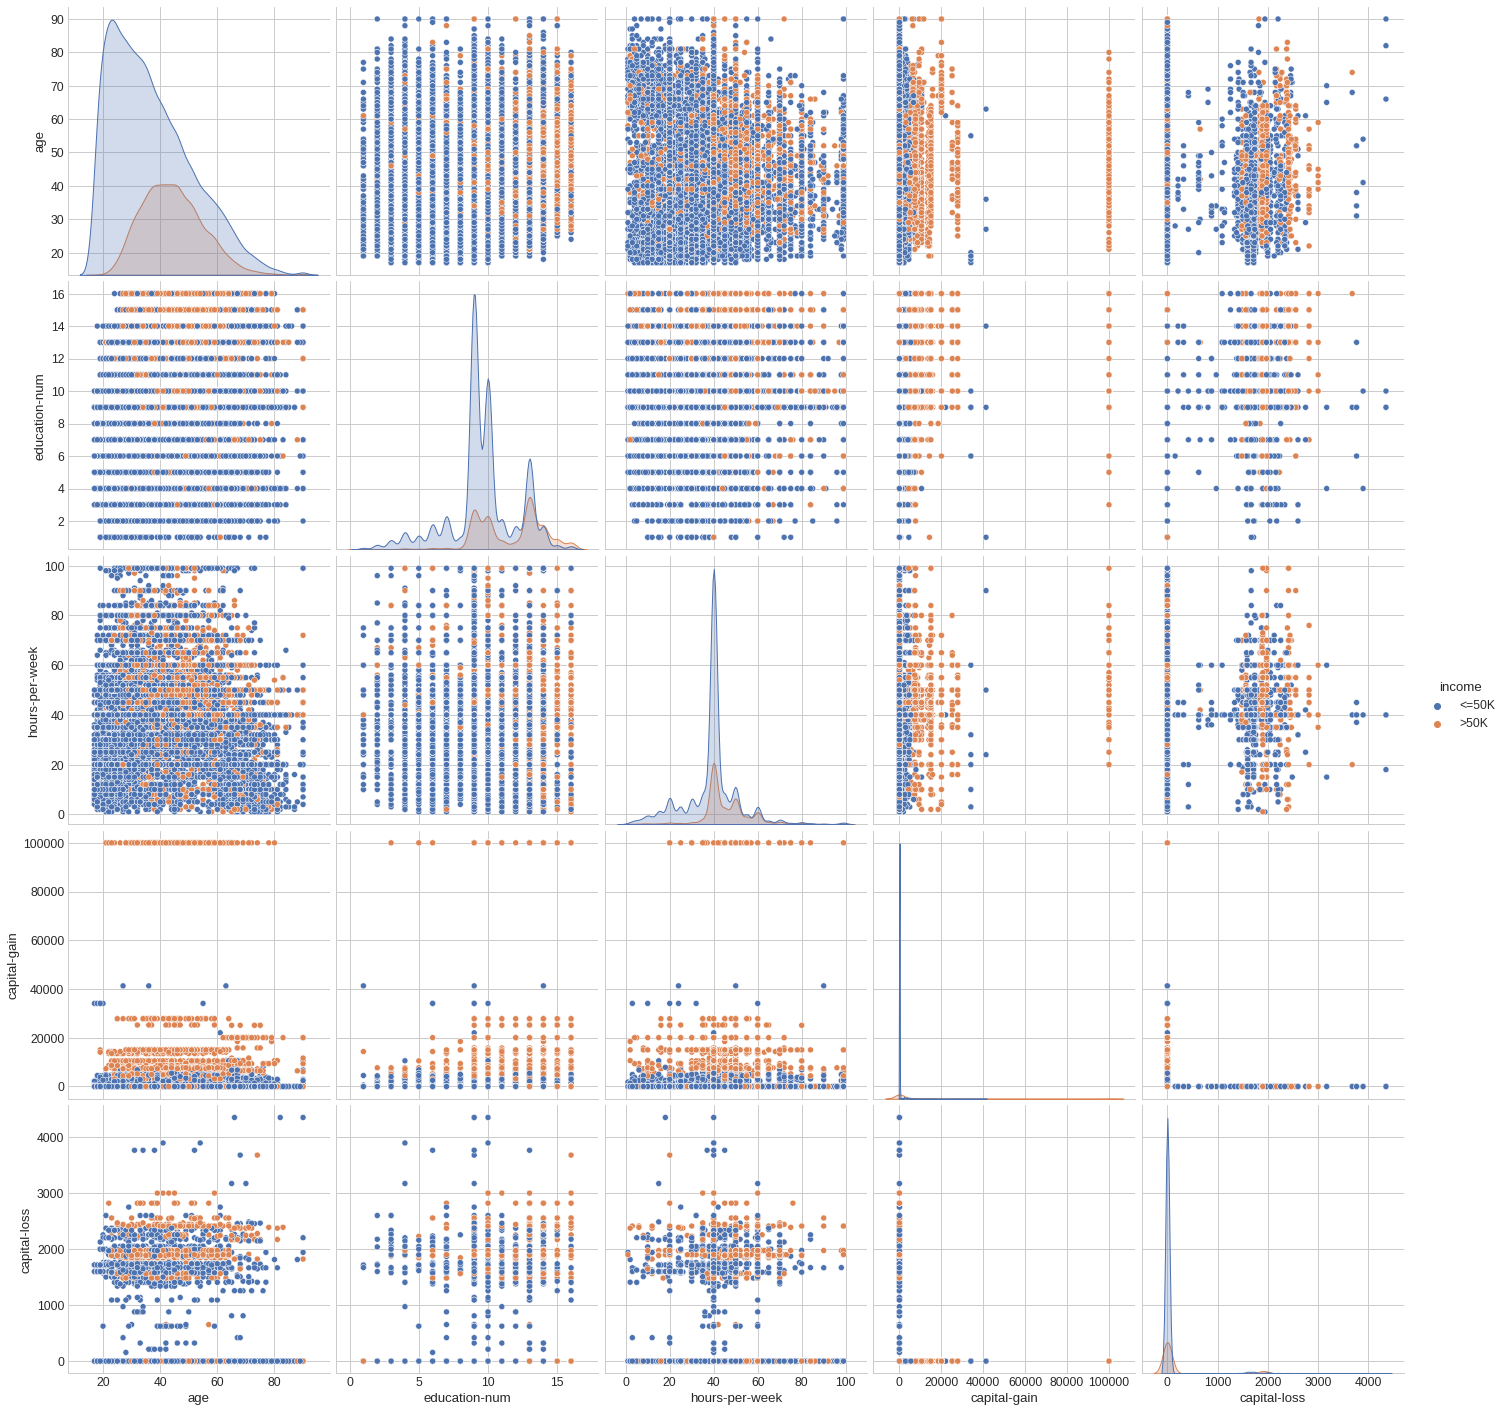

In [35]:
# Interaction between pairs of features.
sns.pairplot(df_ci[['age','education-num','hours-per-week','income','capital-gain','capital-loss']], 
             hue="income", 
             diag_kind="kde",
             size=4);

Feature Encoding
Let's perform both Label encoding.

In [36]:
# Label Encode all labels
dataset_enc = df_ci.apply(LabelEncoder().fit_transform)

dataset_enc.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,6,3461,9,12,4,0,1,4,1,27,0,39,38,0
1,33,5,3788,9,12,2,3,0,4,1,0,0,12,38,0
2,21,3,18342,11,8,0,5,1,4,1,0,0,39,38,0
3,36,3,19995,1,6,2,5,0,2,1,0,0,39,38,0
4,11,3,25405,9,12,2,9,5,2,0,0,0,39,4,0


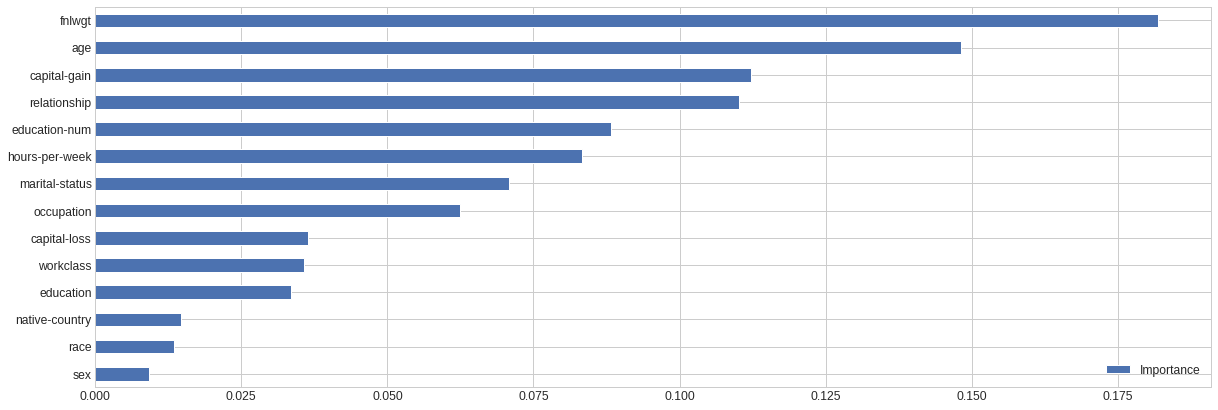

In [37]:
# Using Random Forest to gain an insight on Feature Importance
clf = RandomForestClassifier()
clf.fit(dataset_enc.drop('income', axis=1), dataset_enc['income'])

plt.style.use('seaborn-whitegrid')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=dataset_enc.drop('income', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));


In [38]:
# Calculating PCA for dataset, and graphing the Variance for each feature of dataset
std_scale = preprocessing.StandardScaler().fit(dataset_enc.drop('income', axis=1))
X = std_scale.transform(dataset_enc.drop('income', axis=1))
pca = PCA(n_components=len(dataset_enc.columns)-1)
fit = pca.fit(X)

<BarContainer object of 14 artists>

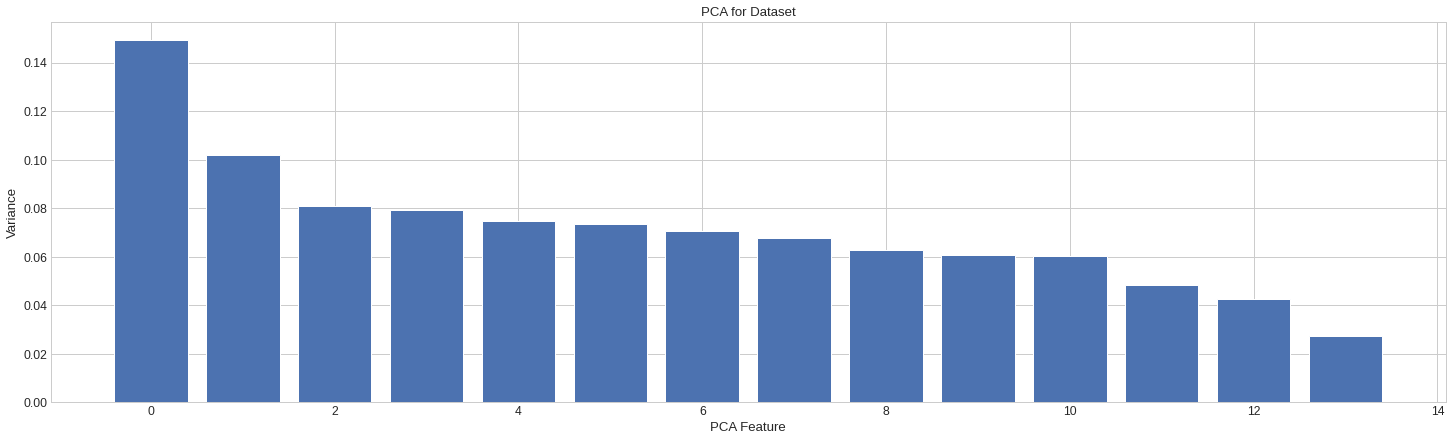

In [39]:
# Graphing the variance per feature
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(25,7)) 
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for Dataset')
plt.bar(range(0, fit.explained_variance_ratio_.size), fit.explained_variance_ratio_)


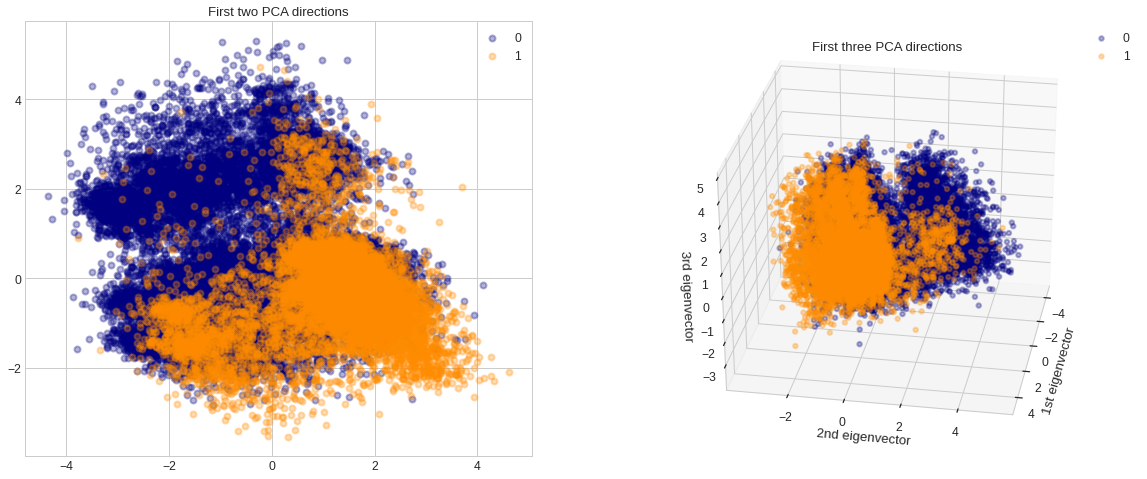

In [40]:
# PCA's components graphed in 2D and 3D
# Apply Scaling 
std_scale = preprocessing.StandardScaler().fit(dataset_enc.drop('income', axis=1))
X = std_scale.transform(dataset_enc.drop('income', axis=1))
y = dataset_enc['income']

# Formatting
target_names = [0,1]
colors = ['navy','darkorange']
lw = 2
alpha = 0.3
# 2 Components PCA
plt.style.use('seaborn-whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                color=color, 
                alpha=alpha, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions');

# 3 Components PCA
ax = plt.subplot(1, 2, 2, projection='3d')

# 3 Components PCA
ax = plt.subplot(1, 2, 2, projection='3d')

pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
               color=color,
               alpha=alpha,
               lw=lw, 
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# rotate the axes
ax.view_init(30, 10)

Feature Ranking : [1 1 6 1 1 1 3 1 4 1 1 1 5 2]
Optimal number of features : 9


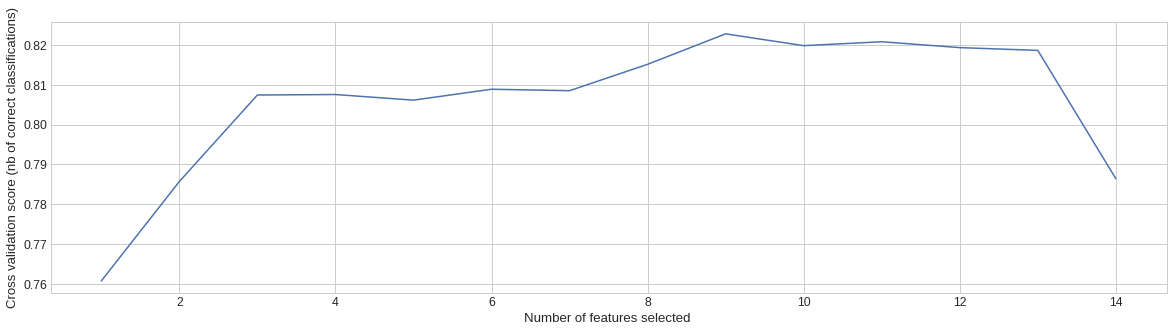

In [41]:
# Calculating RFE for dataset, and graphing the Importance for each feature in dataset
selector1 = RFECV(LogisticRegression(), step=1, cv=5, n_jobs=-1)
selector1 = selector1.fit(dataset_enc.drop('income', axis=1).values, dataset_enc['income'].values)
print("Feature Ranking : %s" % selector1.ranking_)
print("Optimal number of features : %d" % selector1.n_features_)
# Plot number of features VS. cross-validation scores
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,5)) 
plt.xlabel("Number of features selected ")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(selector1.grid_scores_) + 1), selector1.grid_scores_);

# Feature space could be subsetted like so:
dataset_enc = dataset_enc[dataset_enc.columns[np.insert(selector1.support_, 0, True)]]

We now have the dataset to apply our ML algorithms.

In [42]:
selected_dataset = dataset_enc
selected_dataset

,age,workclass,fnlwgt,education-num,marital-status,occupation,race,capital-gain,capital-loss,hours-per-week
0,22,6,3461,12,4,0,4,27,0,39
1,33,5,3788,12,2,3,4,0,0,12
2,21,3,18342,8,0,5,4,0,0,39
3,36,3,19995,6,2,5,2,0,0,39
4,11,3,25405,12,2,9,2,0,0,39
...,...,...,...,...,...,...,...,...,...,...
48837,22,3,18319,12,0,9,4,0,0,35
48838,47,3,24787,8,6,9,2,0,0,39
48839,21,3,26541,12,2,9,4,0,0,49
48840,27,3,3833,12,0,0,1,82,0,39


In [43]:
#Feature Scaling
X = selected_dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
#check input dataset
X

,age,workclass,fnlwgt,education-num,marital-status,occupation,race,capital-gain,capital-loss,hours-per-week
0,0.025996,2.611034,-1.290800,1.136512,0.916138,-1.550298,0.392384,0.844996,-0.20508,-0.032267
1,0.828308,1.710780,-1.249644,1.136512,-0.410397,-0.794402,0.392384,-0.277867,-0.20508,-2.228256
2,-0.046942,-0.089727,0.582101,-0.419335,-1.736932,-0.290471,0.392384,-0.277867,-0.20508,-0.032267
3,1.047121,-0.089727,0.790145,-1.197259,-0.410397,-0.290471,-1.971746,-0.277867,-0.20508,-0.032267
4,-0.776316,-0.089727,1.471040,1.136512,-0.410397,0.717391,-1.971746,-0.277867,-0.20508,-0.032267
...,...,...,...,...,...,...,...,...,...,...
48837,0.025996,-0.089727,0.579207,1.136512,-1.736932,0.717391,0.392384,-0.277867,-0.20508,-0.357599
48838,1.849433,-0.089727,1.393260,-0.419335,2.242673,0.717391,-1.971746,-0.277867,-0.20508,-0.032267
48839,-0.046942,-0.089727,1.614015,1.136512,-0.410397,0.717391,0.392384,-0.277867,-0.20508,0.781062
48840,0.390683,-0.089727,-1.243980,1.136512,-1.736932,-1.550298,-3.153810,3.132309,-0.20508,-0.032267


In [44]:
#check output dataset
y

0        0
1        0
2        0
3        0
4        0
        ..
48837    0
48838    0
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

In [45]:
#split train and test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [46]:
#check shape of train dataset
X_train.shape

(34189, 10)

In [47]:
# calculate the fpr and tpr for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [48]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          GaussianNB, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier,
                          GradientBoostingClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

In [49]:
# Logistic Regression - Random Search for Hyperparameters
import time
# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {'penalty': ['l2', 'l1'], 
                         'class_weight': [None, 'balanced'],
                         'C': np.logspace(-20, 20, 10000), 
                         'intercept_scaling': np.logspace(-20, 20, 10000)}

# Run Randomized Search
n_iter_search = 10
lrc = LogisticRegression()
random_search = RandomizedSearchCV(lrc, 
                                   n_jobs=-1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 1.30 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.815 (std: 0.001)
Parameters: {'penalty': 'l2', 'intercept_scaling': 3.0251580877705364e-13, 'class_weight': None, 'C': 1219.8561803315788}

Model with rank: 1
Mean validation score: 0.815 (std: 0.001)
Parameters: {'penalty': 'l2', 'intercept_scaling': 243522.2534400835, 'class_weight': None, 'C': 716449392155.0266}

Model with rank: 3
Mean validation score: 0.754 (std: 0.006)
Parameters: {'penalty': 'l2', 'intercept_scaling': 1.6596709874567813e-20, 'class_weight': 'balanced', 'C': 3.236316631602414}

Model with rank: 4
Mean validation score: nan (std: nan)
Parameters: {'penalty': 'l1', 'intercept_scaling': 1938780990525094.2, 'class_weight': None, 'C': 2.6536423174976287e+18}

Model with rank: 5
Mean validation score: nan (std: nan)
Parameters: {'penalty': 'l1', 'intercept_scaling': 8.020296410526103e-19, 'class_weight': None, 'C': 8.113176407530938e-09}



In [50]:
# Logistic Regression
import datetime
start_time = time.time()
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(LogisticRegression(n_jobs = -1),X_train,y_train,X_test,10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 81.63
Accuracy CV 10-Fold: 81.46
Running Time: 0:00:00.959323


In [51]:
print (metrics.classification_report(y_train, train_pred_log) )

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     25955
           1       0.69      0.41      0.52      8234

    accuracy                           0.81     34189
   macro avg       0.76      0.68      0.70     34189
weighted avg       0.80      0.81      0.80     34189



In [52]:
print (metrics.classification_report(y_test, test_pred_log) )

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     11200
           1       0.68      0.41      0.51      3453

    accuracy                           0.82     14653
   macro avg       0.76      0.68      0.70     14653
weighted avg       0.80      0.82      0.80     14653



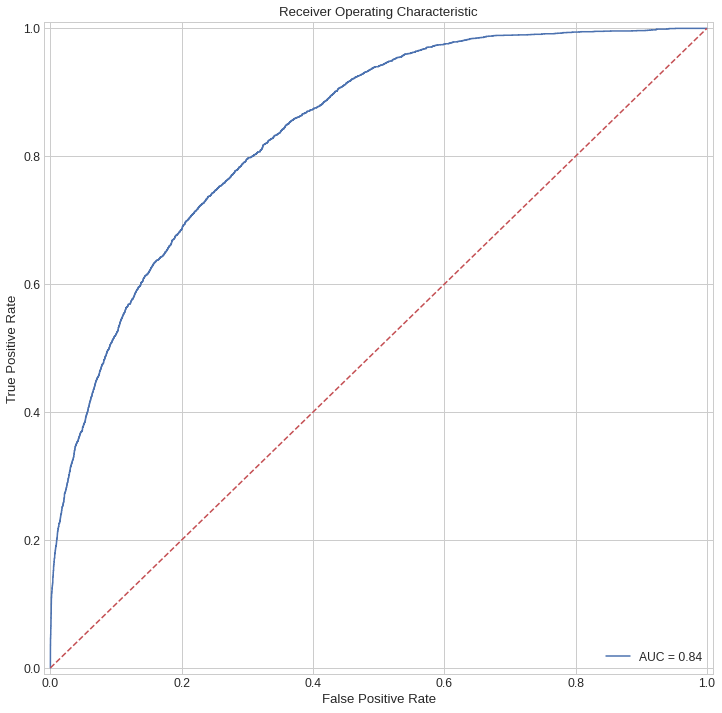

In [53]:
plot_roc_curve(y_test, probs_log)

In [54]:
# k-Nearest Neighbors
start_time = time.time()
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3,
                                                                                                 n_jobs = -1), 
                                                                                                 X_train, 
                                                                                                 y_train, 
                                                                                                 X_test, 
                                                                                                 10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 83.03
Accuracy CV 10-Fold: 82.77
Running Time: 0:00:31.898735


In [55]:
print (metrics.classification_report(y_train, train_pred_knn) )

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     25955
           1       0.65      0.61      0.63      8234

    accuracy                           0.83     34189
   macro avg       0.77      0.75      0.76     34189
weighted avg       0.82      0.83      0.83     34189



In [56]:
print (metrics.classification_report(y_test, test_pred_knn) )

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     11200
           1       0.65      0.62      0.63      3453

    accuracy                           0.83     14653
   macro avg       0.77      0.76      0.76     14653
weighted avg       0.83      0.83      0.83     14653



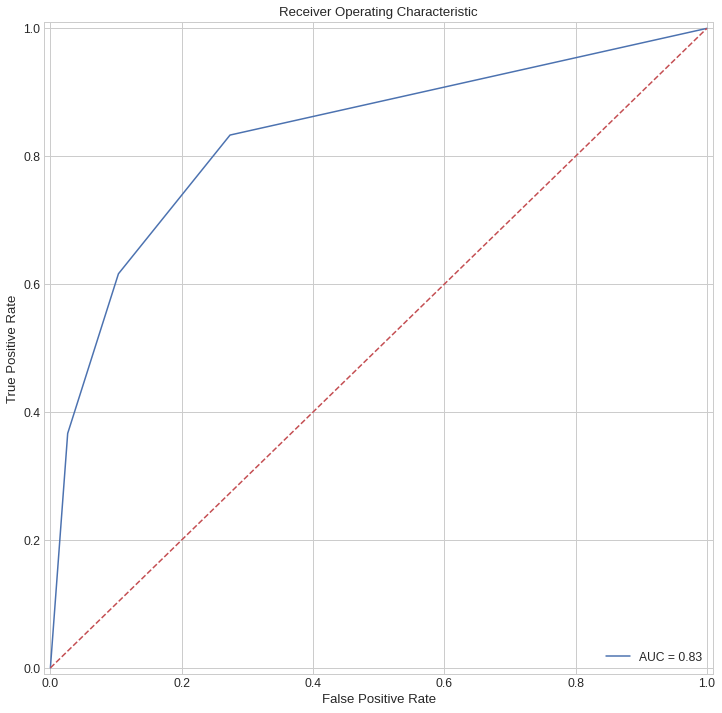

In [57]:
plot_roc_curve(y_test, probs_knn)

In [58]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, test_pred_gaussian, acc_gaussian, acc_cv_gaussian, probs_gau = fit_ml_algo(GaussianNB(), 
                                                                                     X_train, 
                                                                                     y_train, 
                                                                                     X_test, 
                                                                                     10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 80.73
Accuracy CV 10-Fold: 80.1
Running Time: 0:00:00.302157


In [59]:
print (metrics.classification_report(y_train, train_pred_gaussian) )

              precision    recall  f1-score   support

           0       0.82      0.95      0.88     25955
           1       0.67      0.34      0.45      8234

    accuracy                           0.80     34189
   macro avg       0.74      0.64      0.67     34189
weighted avg       0.78      0.80      0.78     34189



In [60]:
print (metrics.classification_report(y_test, test_pred_gaussian) )

              precision    recall  f1-score   support

           0       0.83      0.95      0.88     11200
           1       0.67      0.35      0.46      3453

    accuracy                           0.81     14653
   macro avg       0.75      0.65      0.67     14653
weighted avg       0.79      0.81      0.78     14653



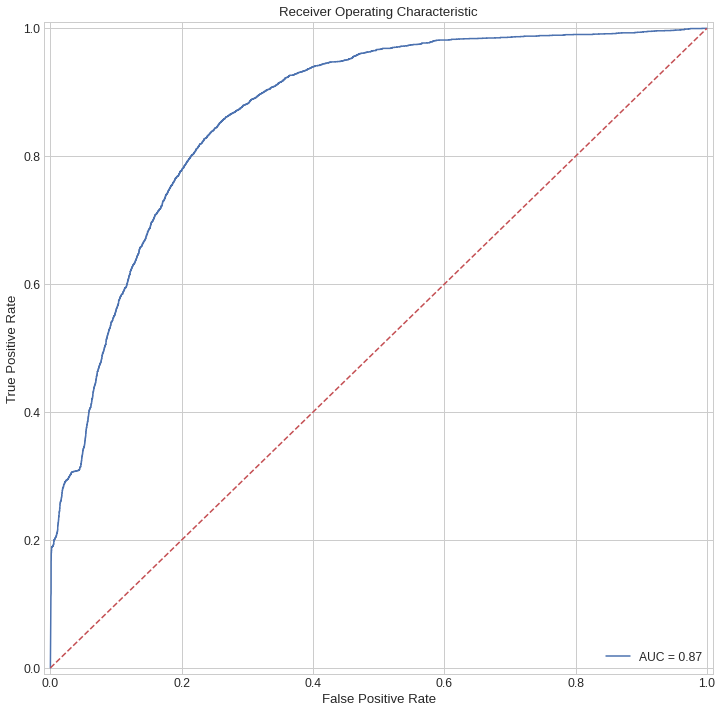

In [61]:
plot_roc_curve(y_test, probs_gau)

In [62]:
# Linear SVC
start_time = time.time()
train_pred_svc, test_pred_svc, acc_linear_svc, acc_cv_linear_svc, probs_svc = fit_ml_algo(LinearSVC(),
                                                                                           X_train, 
                                                                                           y_train,
                                                                                           X_test, 
                                                                                           10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 81.64
Accuracy CV 10-Fold: 81.31
Running Time: 0:00:34.932373


In [63]:
print (metrics.classification_report(y_train, train_pred_svc) )

              precision    recall  f1-score   support

           0       0.83      0.95      0.89     25955
           1       0.72      0.37      0.49      8234

    accuracy                           0.81     34189
   macro avg       0.77      0.66      0.69     34189
weighted avg       0.80      0.81      0.79     34189



In [64]:
print (metrics.classification_report(y_test, test_pred_svc) )

              precision    recall  f1-score   support

           0       0.83      0.95      0.89     11200
           1       0.71      0.37      0.49      3453

    accuracy                           0.82     14653
   macro avg       0.77      0.66      0.69     14653
weighted avg       0.80      0.82      0.79     14653



In [65]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, test_pred_sgd, acc_sgd, acc_cv_sgd, probs_sgd = fit_ml_algo(SGDClassifier(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 81.02
Accuracy CV 10-Fold: 80.43
Running Time: 0:00:01.177133


In [66]:
print (metrics.classification_report(y_train, train_pred_sgd) )

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     25955
           1       0.74      0.29      0.42      8234

    accuracy                           0.80     34189
   macro avg       0.77      0.63      0.65     34189
weighted avg       0.79      0.80      0.77     34189



In [67]:
print (metrics.classification_report(y_test, test_pred_sgd) )

              precision    recall  f1-score   support

           0       0.82      0.97      0.89     11200
           1       0.73      0.31      0.43      3453

    accuracy                           0.81     14653
   macro avg       0.78      0.64      0.66     14653
weighted avg       0.80      0.81      0.78     14653



In [68]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 81.29
Accuracy CV 10-Fold: 80.92
Running Time: 0:00:01.517813


In [69]:
print (metrics.classification_report(y_train, train_pred_dt) )

              precision    recall  f1-score   support

           0       0.88      0.87      0.87     25955
           1       0.60      0.62      0.61      8234

    accuracy                           0.81     34189
   macro avg       0.74      0.74      0.74     34189
weighted avg       0.81      0.81      0.81     34189



In [70]:
print (metrics.classification_report(y_test, test_pred_dt) )

              precision    recall  f1-score   support

           0       0.88      0.87      0.88     11200
           1       0.60      0.63      0.61      3453

    accuracy                           0.81     14653
   macro avg       0.74      0.75      0.74     14653
weighted avg       0.82      0.81      0.81     14653



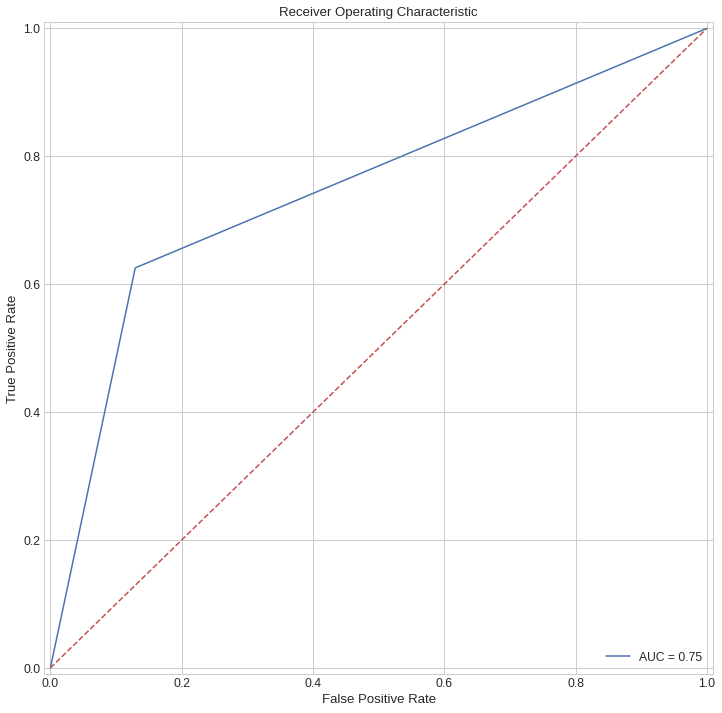

In [71]:
plot_roc_curve(y_test, probs_dt)

In [72]:
# Random Forest Classifier - Random Search for Hyperparameters

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {"max_depth": [10, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 20),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Run Randomized Search
n_iter_search = 10
rfc = RandomForestClassifier(n_estimators=10)
random_search = RandomizedSearchCV(rfc, 
                                   n_jobs = -1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 23.33 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.859 (std: 0.004)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 5, 'min_samples_split': 13}

Model with rank: 2
Mean validation score: 0.858 (std: 0.003)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 13}

Model with rank: 3
Mean validation score: 0.857 (std: 0.002)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 9, 'min_samples_split': 7}

Model with rank: 4
Mean validation score: 0.857 (std: 0.003)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 8, 'min_samples_split': 17}

Model with rank: 5
Mean validation score: 0.856 (std: 0.003)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth

In [73]:
# Random Forest Classifier
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=10, 
                             min_samples_leaf=2,
                             min_samples_split=17, 
                             criterion='gini', 
                             max_features=8)
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf = fit_ml_algo(rfc, 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

Accuracy: 86.08
Accuracy CV 10-Fold: 85.62
Running Time: 0:00:06.525095


In [74]:
print (metrics.classification_report(y_train, train_pred_rf) )

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     25955
           1       0.74      0.62      0.67      8234

    accuracy                           0.86     34189
   macro avg       0.81      0.77      0.79     34189
weighted avg       0.85      0.86      0.85     34189



In [75]:
print (metrics.classification_report(y_test, test_pred_rf) )

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     11200
           1       0.74      0.62      0.68      3453

    accuracy                           0.86     14653
   macro avg       0.82      0.78      0.79     14653
weighted avg       0.86      0.86      0.86     14653



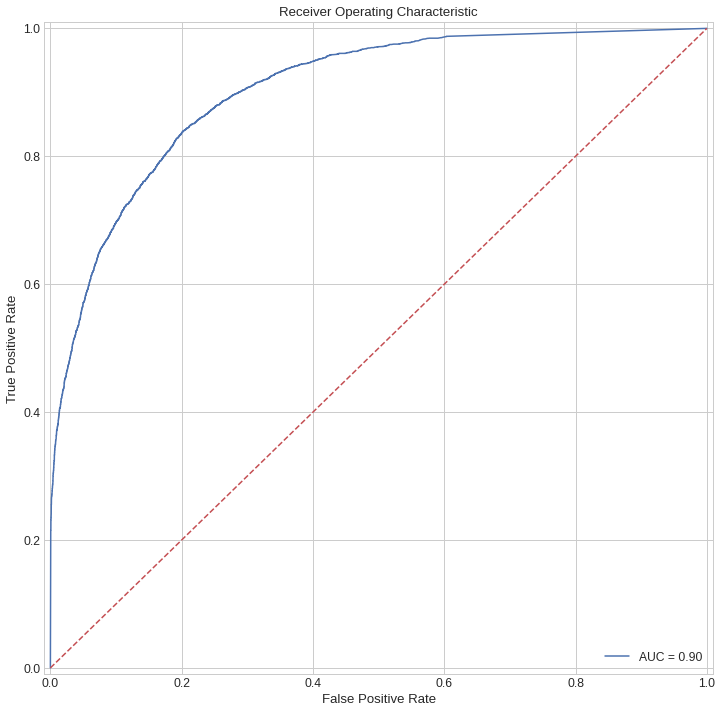

In [76]:
plot_roc_curve(y_test, probs_rf)

In [77]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, test_pred_gbt, acc_gbt, acc_cv_gbt, probs_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.38
Accuracy CV 10-Fold: 86.47
Running Time: 0:00:29.586523


In [78]:
print (metrics.classification_report(y_train, train_pred_gbt) )

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     25955
           1       0.79      0.59      0.68      8234

    accuracy                           0.86     34189
   macro avg       0.84      0.77      0.80     34189
weighted avg       0.86      0.86      0.86     34189



In [79]:
print (metrics.classification_report(y_test, test_pred_gbt) )

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     11200
           1       0.78      0.59      0.67      3453

    accuracy                           0.86     14653
   macro avg       0.83      0.77      0.79     14653
weighted avg       0.86      0.86      0.86     14653



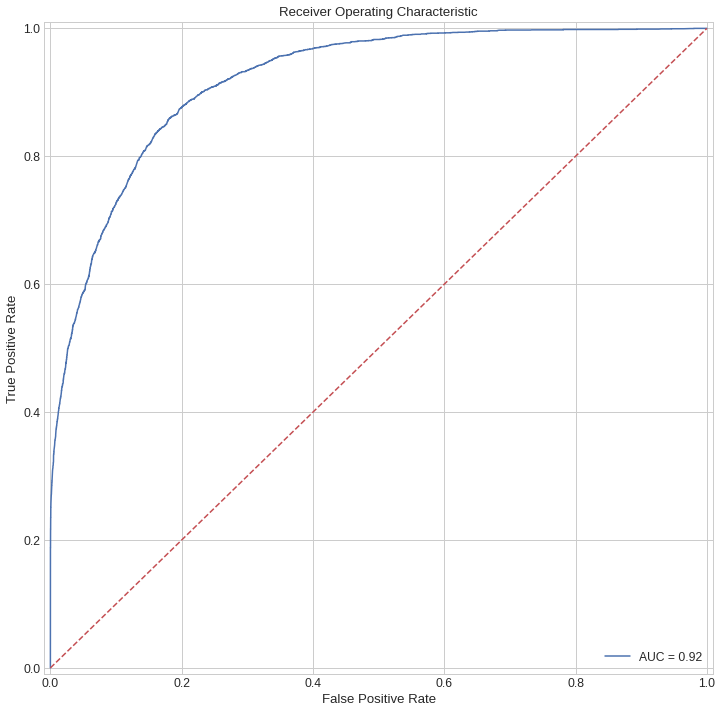

In [80]:
plot_roc_curve(y_test, probs_gbt)

In [81]:
#Let's rank the results for all the algorithms we have used.
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_knn, 
        acc_log, 
        acc_rf, 
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt
    ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
7,Gradient Boosting Trees,86.38
2,Random Forest,86.08
0,KNN,83.03
5,Linear SVC,81.64
1,Logistic Regression,81.63
6,Decision Tree,81.29
4,Stochastic Gradient Decent,81.02
3,Naive Bayes,80.73


In [82]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,     
        acc_cv_rf, 
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt
    ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
7,Gradient Boosting Trees,86.47
2,Random Forest,85.62
0,KNN,82.77
1,Logistic Regression,81.46
5,Linear SVC,81.31
6,Decision Tree,80.92
4,Stochastic Gradient Decent,80.43
3,Naive Bayes,80.10


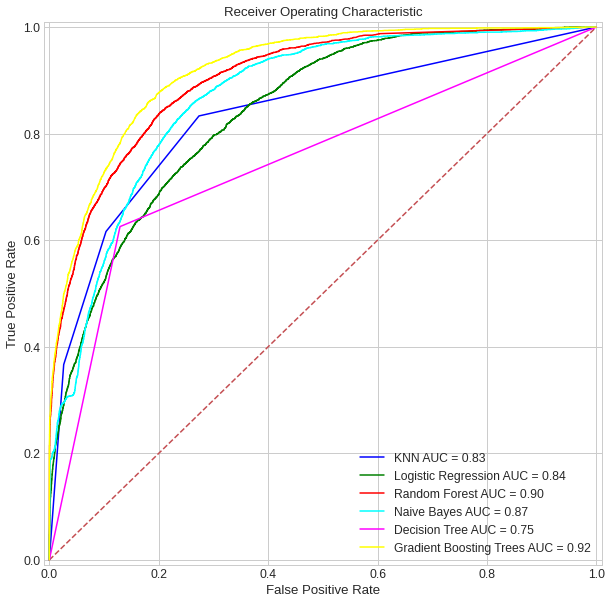

In [83]:
#Lets see the graphical representation of comparison between the 8 classification algos applied above.
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10)) 

models = [
    'KNN', 
    'Logistic Regression', 
    'Random Forest', 
    'Naive Bayes', 
    'Decision Tree', 
    'Gradient Boosting Trees'
]
probs = [
    probs_knn,
    probs_log,
    probs_rf,
    probs_gau,
    probs_dt,
    probs_gbt
]
colors = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'yellow',
]
    
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')
    
for i, model in list(enumerate(models)):
    plot_roc_curves(y_test, probs[i], models[i])
    
plt.show()


After applying all the above classification algos on the census dataset we see that Gradient Boosting trees fits the best for our objective.

***